# Neural Network for solving XOR problem

Simple feedforward implementation of a neural network with one hidden layer that is trained to perform a XOR classification

* 0 0 --> 0
* 0 1 --> 1
* 1 0 --> 1
* 1 1 --> 0

Iteration: 0. Error: 0.5021623245875458
Iteration: 1000. Error: 0.2628390537826071
Iteration: 2000. Error: 0.25492225049100736
Iteration: 3000. Error: 0.2529750559468491
Iteration: 4000. Error: 0.25211444596894617
Iteration: 5000. Error: 0.2516333787262528
Iteration: 6000. Error: 0.2513274594596264
Iteration: 7000. Error: 0.2511163143911058
Iteration: 8000. Error: 0.2509620736363259
Iteration: 9000. Error: 0.25084460748456816
Iteration: 10000. Error: 0.25075224781475924
Iteration: 11000. Error: 0.25067777389067547
Iteration: 12000. Error: 0.250616482203833
Iteration: 13000. Error: 0.2505651798309126
Iteration: 14000. Error: 0.2505216243871755
Training complete
Percentages: 
[[9.99369231e-01]
 [4.99671975e-01]
 [7.10624232e-04]
 [5.00267363e-01]]
Predictions: 
[[1.]
 [0.]
 [0.]
 [1.]]


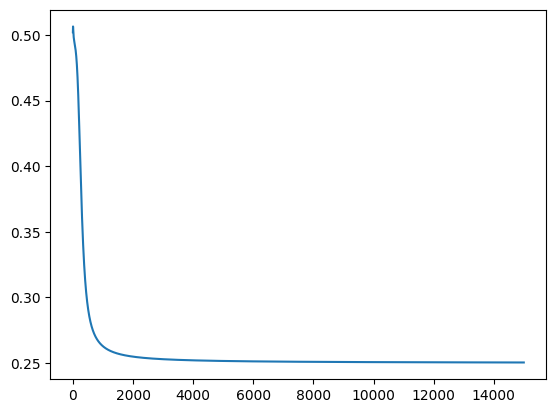

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative for backpropagation 
def sigmoid_der(x):
    return sigmoid(x)*sigmoid(-x)

# Forward function
def forward(x, w1, w2, predict=False):
    a1 = np.matmul(x,w1) 
    z1 = sigmoid(a1) 

    # Create and add bias
    bias = np.ones((len(z1),1)) 
    z1   = np.concatenate((bias,z1), axis=1) 
    a2   = np.matmul(z1,w2) 
    z2   = sigmoid(a2) 

    if predict:
        return z2
    return a1, z1, a2, z2 

# Backpropagation function
def backprop(a2,z0, z1, z2, y):
    delta2 = z2 -y
    Delta2 = np.matmul(z1.T, delta2)
    delta1 = (delta2.dot(w2[1:,:].T))*sigmoid_der(a1) 
    Delta1 = np.matmul(z0.T, delta1) 

    return delta2, Delta1, Delta2 
    

# First column is the bias
X = np.array([
    [1,1,0],
    [1,0,1],
    [1,0,0],
    [1,1,1]
            ])

# Output
y = np.array([[1],[1],[0],[0]])

# Initialization of weights
# 3 input features considering
# also the bias term and 2 neurons in the hidden layer
w1 = np.random.randn(3, 2) 
# 3 neurons in the hidden layer considering also the bias term
# and one output neuron
w2 = np.random.randn(3, 1)

# Init learning rate
eta = 0.59

costs = []

# Init Epochs
epochs = 15000

m = len(X)

# Start training
for i in range(epochs):

    # Forward
    a1, z1, a2, z2 = forward(X, w1, w2)

    # BackProp
    delta2, Delta1, Delta2 = backprop(a2,X,z1,z2,y)

    w1 -= eta*(1/m)*Delta1 
    w2 -= eta*(1/m)*Delta2 

    # Add costs to list for plotting
    c = np.mean(np.abs(delta2)) 
    costs.append(c) 

    if i % 1000 == 0:
        print(f"Iteration: {i}. Error: {c}") 

# Training complete
print("Training complete") 

# Make predictions
z3 = forward(X, w1, w2, True)
print("Percentages: ")
print(z3)
print("Predictions: ")
print(np.round(z3))

# Plot cost
plt.plot(costs)
plt.show()